<h1 align=center><font size = 7>Intelia Internship Test</font></h1>

# **Classification**

---

### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Read and store data in a dataframe

In [2]:
df = pd.read_excel('Clean_data.xls')

In [3]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [4]:
df.head(3)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.106305,0.108336,0.427099,0.114783,0.131790,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.106592,0.104315,0.441581,0.111974,0.135103,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.108303,0.106219,0.435777,0.111883,0.133362,1.926427,Control,Memantine,C/S,c-CS-m


### Check if there are wrongly read datatyes

In [5]:
df.dtypes.value_counts()

float64    75
object      5
dtype: int64

### Explore the dataset

In [6]:
df.describe().round(2)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,CaNA_N
count,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,...,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00
mean,0.42,0.62,0.32,2.29,3.83,0.23,0.18,3.53,0.21,1.42,...,1.24,0.85,0.23,0.16,0.12,0.13,0.45,0.17,0.18,1.34
std,0.25,0.25,0.05,0.37,0.95,0.04,0.03,1.31,0.03,0.47,...,0.17,0.09,0.03,0.03,0.01,0.02,0.07,0.05,0.04,0.32
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.75,0.58,0.16,0.09,0.07,0.09,0.26,0.08,0.11,0.59
25%,0.29,0.47,0.29,2.06,3.15,0.21,0.16,2.47,0.19,1.20,...,1.12,0.79,0.21,0.14,0.11,0.11,0.40,0.13,0.16,1.08
50%,0.37,0.57,0.32,2.30,3.74,0.23,0.18,3.33,0.21,1.36,...,1.24,0.85,0.22,0.15,0.12,0.13,0.45,0.16,0.17,1.32
75%,0.49,0.70,0.35,2.53,4.43,0.26,0.20,4.48,0.23,1.56,...,1.36,0.92,0.24,0.17,0.13,0.14,0.49,0.19,0.20,1.59
max,2.52,2.60,0.50,3.76,8.48,0.54,0.32,7.46,0.31,6.11,...,1.90,1.20,0.36,0.28,0.16,0.26,0.76,0.48,0.36,2.13


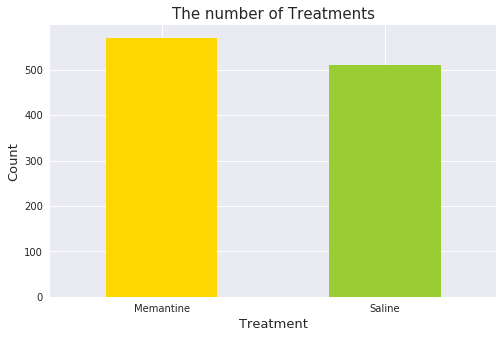

In [7]:
colors_list = ['gold', 'yellowgreen']
sns.set(style="darkgrid")
Treatment = df['Treatment'].value_counts()

Treatment.plot(kind='bar', color = colors_list, figsize=(8, 5))

plt.title('The number of Treatments',fontdict={"fontsize": 15}) 
plt.ylabel('Count', fontsize=13) 
plt.xlabel("Treatment", fontsize=13)
plt.xticks(rotation=0)
plt.show()

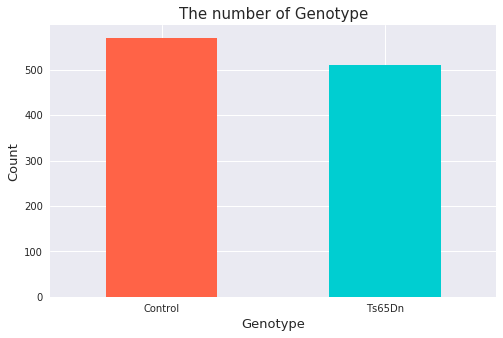

In [8]:
colour_list = ["tomato","darkturquoise"]
sns.set(style="darkgrid")
Genotype = df['Genotype'].value_counts()
Genotype.plot(kind='bar', color = colour_list, figsize=(8, 5))

plt.title('The number of Genotype',fontsize='15') 
plt.ylabel('Count', fontsize=13) 
plt.xlabel("Genotype", fontsize=13)
plt.xticks(rotation=0)
plt.show()

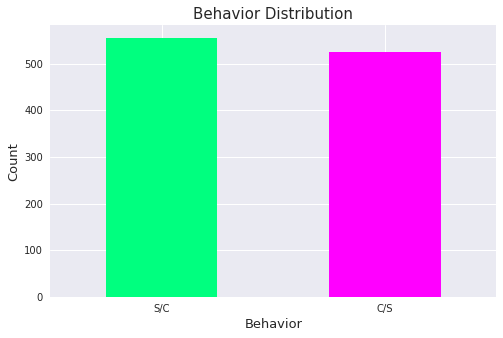

In [9]:
colour_list = ["springgreen","magenta"]
sns.set(style="darkgrid")
Behavior = df['Behavior'].value_counts()
Behavior.plot(kind='bar', color = colour_list, figsize=(8, 5))

plt.title('Behavior Distribution',fontsize='15') 
plt.ylabel('Count', fontsize=13) 
plt.xlabel("Behavior", fontsize=13)
plt.xticks(rotation=0)
plt.show()

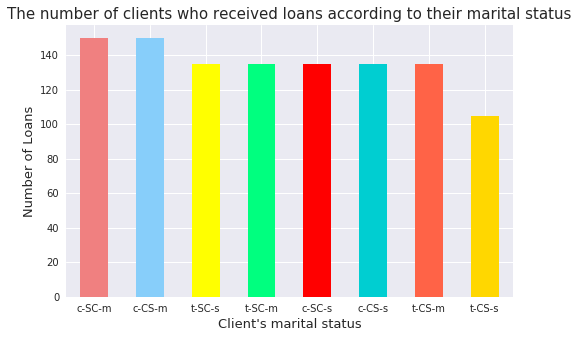

In [10]:
colour_list = ["lightcoral","lightskyblue","yellow","springgreen","red","darkturquoise","tomato","gold","yellowgreen"]
sns.set(style="darkgrid")
claxx = df['class'].value_counts()
claxx.plot(kind='bar', color = colour_list, figsize=(8, 5))

plt.title('The number of clients who received loans according to their marital status',fontsize='15') 
plt.ylabel('Number of Loans', fontsize=13) 
plt.xlabel("Client's marital status", fontsize=13)
plt.xticks(rotation=0)
plt.show()

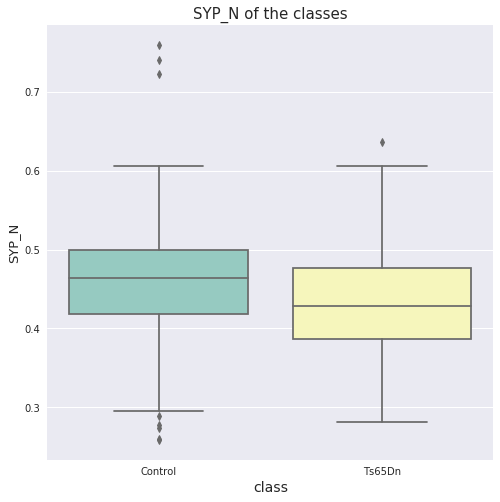

In [11]:
plt.figure(figsize=(8, 8))
sns.set(style="darkgrid")
sns.boxplot(x='Genotype', y='SYP_N', palette="Set3", data = df)
plt.title('SYP_N of the classes',fontdict={"fontsize": 15})
plt.ylabel('SYP_N', fontsize=13) 
plt.xlabel("class", fontsize=14)
plt.show()

### Drop unnecessary column

In [12]:
df.drop('MouseID', axis = 1, inplace = True)

### Create dummy variable for categorical features

We need to create dummy variables for the categorical columns `Genotype`,`Treatment`, and `Behavior`.

In [13]:
cols = ['Genotype','Treatment','Behavior']
onehot_df = pd.get_dummies(df, columns=cols)

onehot_df.head(2)   # preview the new data set

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,H3AcK18_N,EGR1_N,CaNA_N,class,Genotype_Control,Genotype_Ts65Dn,Treatment_Memantine,Treatment_Saline,Behavior_C/S,Behavior_S/C
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.114783,0.131790,1.675652,c-CS-m,1,0,1,0,1,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.111974,0.135103,1.743610,c-CS-m,1,0,1,0,1,0


### Label encode the dependent variable

In [14]:
# create dataframe for scores
classes = pd.DataFrame({'class':['c-CS-m', 'c-SC-m', 'c-CS-s', 'c-SC-s', 't-CS-m', 't-SC-m', 't-CS-s', 't-SC-s'],
                        'lables':[0,1,2,3,4,5,6,7]})

In [15]:
classes  

,class,lables
0,c-CS-m,0
1,c-SC-m,1
2,c-CS-s,2
3,c-SC-s,3
4,t-CS-m,4
5,t-SC-m,5
6,t-CS-s,6
7,t-SC-s,7


In [16]:
le = LabelEncoder()

onehot_df['class'] = le.fit_transform(onehot_df['class'])

In [17]:
onehot_df.head(2)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,H3AcK18_N,EGR1_N,CaNA_N,class,Genotype_Control,Genotype_Ts65Dn,Treatment_Memantine,Treatment_Saline,Behavior_C/S,Behavior_S/C
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.114783,0.131790,1.675652,0,1,0,1,0,1,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.111974,0.135103,1.743610,0,1,0,1,0,1,0


### Split the dataset

In [18]:
# split the dataset

X = onehot_df.drop('class', axis=1)  # feature variables
y = to_categorical(onehot_df['class'])  # target variable 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 

### Standardize the data

In [19]:
# Define the scaler 
scaler = StandardScaler()

# Scale the train set
X_train = scaler.fit_transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

### Classification model

In [20]:
model = Sequential()

#Adding the input layer and the first hidden layer
model.add(Dense(units = 64, activation = 'relu', input_dim = 81))

# Adding the output layer
model.add(Dense(units = 8, activation = 'softmax'))

In [21]:
# Compiling the Neural Network
model.compile(optimizer = 'adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                5248      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
Total params: 5,768
Trainable params: 5,768
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Fitting the Neural Network to the Training set

model.fit(X_train, y_train, batch_size = 32, epochs = 15)

Epoch 1/15
810/810 [==============================] - 1s 2ms/step - loss: 0.3448 - acc: 0.8742
Epoch 2/15
810/810 [==============================] - 0s 150us/step - loss: 0.2147 - acc: 0.9086
Epoch 3/15
810/810 [==============================] - 0s 146us/step - loss: 0.1302 - acc: 0.9580
Epoch 4/15
810/810 [==============================] - 0s 155us/step - loss: 0.0793 - acc: 0.9860
Epoch 5/15
810/810 [==============================] - 0s 156us/step - loss: 0.0502 - acc: 0.9963
Epoch 6/15
810/810 [==============================] - 0s 138us/step - loss: 0.0337 - acc: 0.9986
Epoch 7/15
810/810 [==============================] - 0s 134us/step - loss: 0.0237 - acc: 0.9997
Epoch 8/15
810/810 [==============================] - 0s 132us/step - loss: 0.0176 - acc: 0.9997
Epoch 9/15
810/810 [==============================] - 0s 132us/step - loss: 0.0135 - acc: 0.9998
Epoch 10/15
810/810 [==============================] - 0s 130us/step - loss: 0.0106 - acc: 1.0000
Epoch 11/15
810/810 [==========

### Model Evaluation

Evaluate model performance on the test set

In [24]:

model.evaluate(X_test, y_test, batch_size=16)

270/270 [==============================] - 0s 247us/step


[0.006311507467870359, 1.0]

### Classification report

In [25]:
y_test = y_test.argmax(axis=1)

preds = model.predict(X_test)
preds = preds.argmax(axis=1)

print(classification_report(y_test, preds, target_names=classes['class']))

             precision    recall  f1-score   support

     c-CS-m       1.00      1.00      1.00        46
     c-SC-m       1.00      1.00      1.00        36
     c-CS-s       1.00      1.00      1.00        39
     c-SC-s       1.00      1.00      1.00        34
     t-CS-m       1.00      1.00      1.00        31
     t-SC-m       1.00      1.00      1.00        20
     t-CS-s       1.00      1.00      1.00        32
     t-SC-s       1.00      1.00      1.00        32

avg / total       1.00      1.00      1.00       270



### Confusion matrix

In [26]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[46  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0]
 [ 0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0 20  0  0]
 [ 0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0 32]]


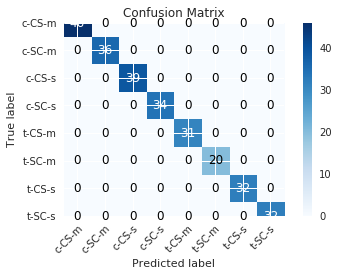

In [27]:
class_names=classes['class']
plot_confusion_matrix(y_test, preds, classes=class_names, title='Confusion Matrix')